In [19]:
import pandas as pd
#Reading data
data=pd.read_csv('C:\\Users\\hewlett\\Desktop\\airquality.csv')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-3-04,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10-3-04,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10-3-04,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10-3-04,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10-3-04,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [14]:
data_=data.loc[:,['CO(GT)','NOx(GT)']]
data_.head()

,CO(GT),NOx(GT)
0,2.6,166
1,2.0,103
2,2.2,131
3,2.2,172
4,1.6,131


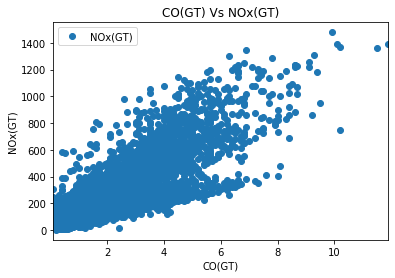

In [52]:
import matplotlib.pyplot as plt
# plotting the graph for the data 
data.plot(x='CO(GT)', y='NOx(GT)', style='o')
plt.title('CO(GT) Vs NOx(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('NOx(GT)')
plt.show()


In [21]:
A=pd.DataFrame(data['CO(GT)'])
B=pd.DataFrame(data['NOx(GT)'])

In [23]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test=train_test_split(A,B,test_size=0.2,random_state=1)

In [37]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(A_train, B_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print(regressor.intercept_)

[-3.44113823]


In [31]:
print(regressor.coef_)

[[117.40658596]]


In [44]:
B_pred=regressor.predict(A_test)
B_pred

array([[113.96544773],
       [266.59400947],
       [278.33466807],
       ...,
       [160.92808211],
       [102.22478913],
       [ 43.52149615]])

In [40]:
B_test

,NOx(GT)
4679,115
968,105
6046,226
1703,58
2864,101
...,...
4268,1148
5474,103
1246,92
6269,114


In [63]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
print('Mean squared error:',metrics.mean_squared_error(B_test,B_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(B_test,B_pred)))
# R squared value
print('R squared value :',r2_score(B_test,B_pred))


Mean squared error: 15825.758546528394
Root mean squared error: 125.80047116973924
R squared value : 0.6465581642042626
